In [1]:
!pip install bubbly

In [2]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
from bubbly.bubbly import bubbleplot
import os
os.environ['PROJ_LIB'] = r'C:\Users\Rohit\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
%matplotlib qt 
IS_LOCAL = False
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [3]:
events_df = pd.read_csv("D:/database.csv")

In [4]:
print("Earthaquakes data -  rows:",events_df.shape[0]," columns:", events_df.shape[1])

Earthaquakes data -  rows: 23412  columns: 21


In [5]:
events_df.head(5)

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type    ...      \
0                     NaN        6.0             MW    ...       
1                     NaN        5.8             MW    ...       
2                     NaN        6.2             MW    ...       
3                     NaN        5.8             MW    ...       
4                     NaN        5.8             MW    ...       

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [6]:
events_df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [7]:
earthquakes = events_df[events_df['Type']=='Earthquake'].copy()

In [8]:
earthquakes["Year"] = pd.to_datetime(earthquakes['Date']).dt.year

In [9]:
print("Years from:", min(earthquakes['Year']), " to:", max(earthquakes['Year']))
print("Magnitude from:", min(earthquakes['Magnitude']), " to:", max(earthquakes['Magnitude']))

Years from: 1965  to: 2016
Magnitude from: 5.5  to: 9.1


In [10]:
earthquakes["RichterM"] = np.power(earthquakes["Magnitude"],10)

In [11]:
figure = bubbleplot(dataset=earthquakes, x_column='Longitude', y_column='Latitude', color_column = 'Magnitude',
    bubble_column = 'Magnitude', time_column='Year', size_column = 'RichterM',
    x_title='Longitude', y_title='Latitude', 
    title='Earthquakes position (long, lat) and magnitude - from 1965 to 2016', 
    colorscale='Rainbow', colorbar_title='Magnitude', 
    x_range=[-181,181], y_range=[-90,90], scale_bubble=0.5, height=650)
iplot(figure, config={'scrollzoom': True})

C:\Users\Rohit\Anaconda3\lib\site-packages\plotly\offline\offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

C:\Users\Rohit\Anaconda3\lib\site-packages\plotly\offline\offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [12]:
events_df['Year']= events_df['Date'].str[6:]


In [13]:
!pip install ffmpeg-normalize

In [14]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [15]:
earth = events_df[["Date","Latitude","Longitude","Magnitude","Depth","Type"]]
longitudes = earth["Longitude"].tolist()
latitudes = earth["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

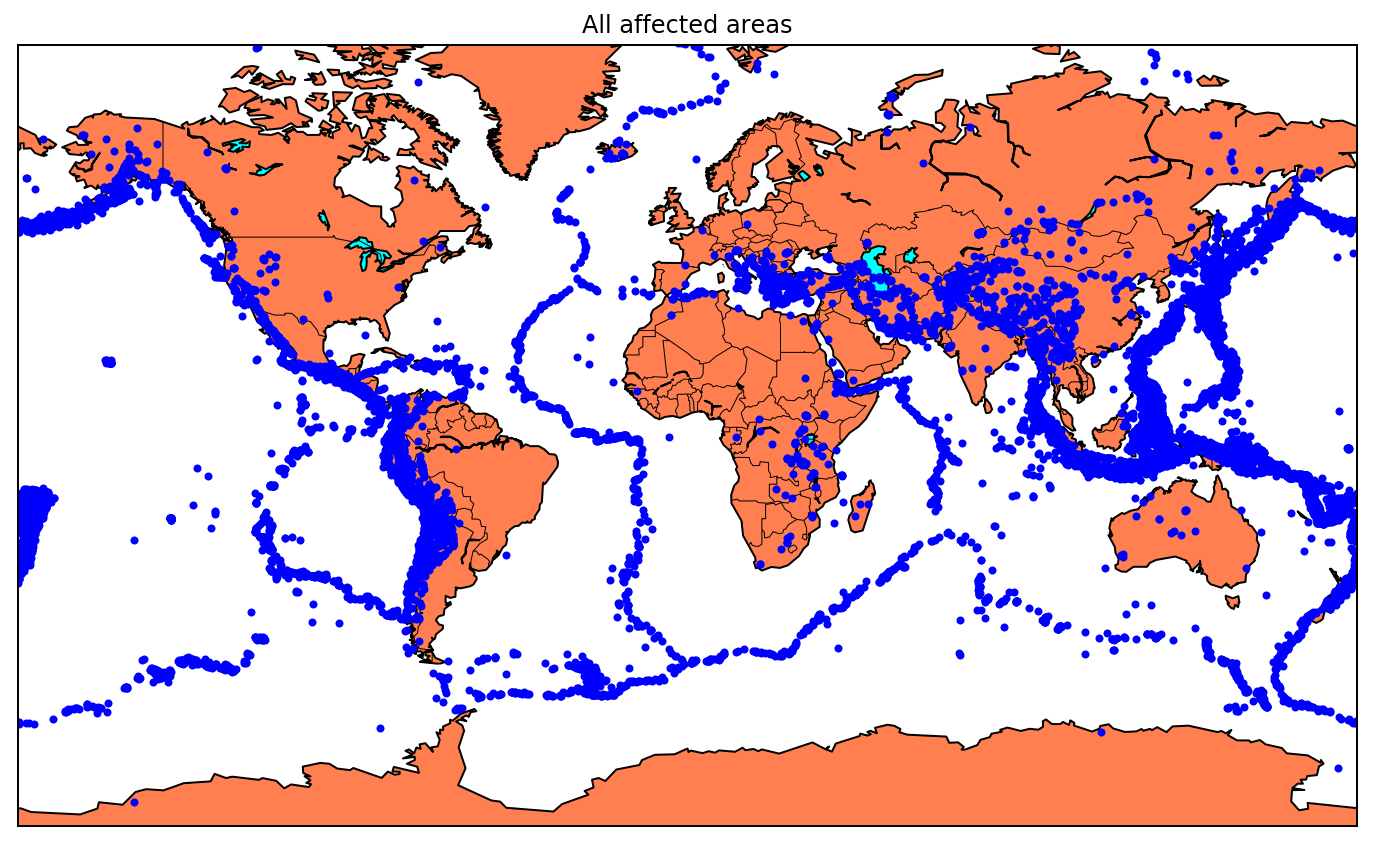

In [16]:
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

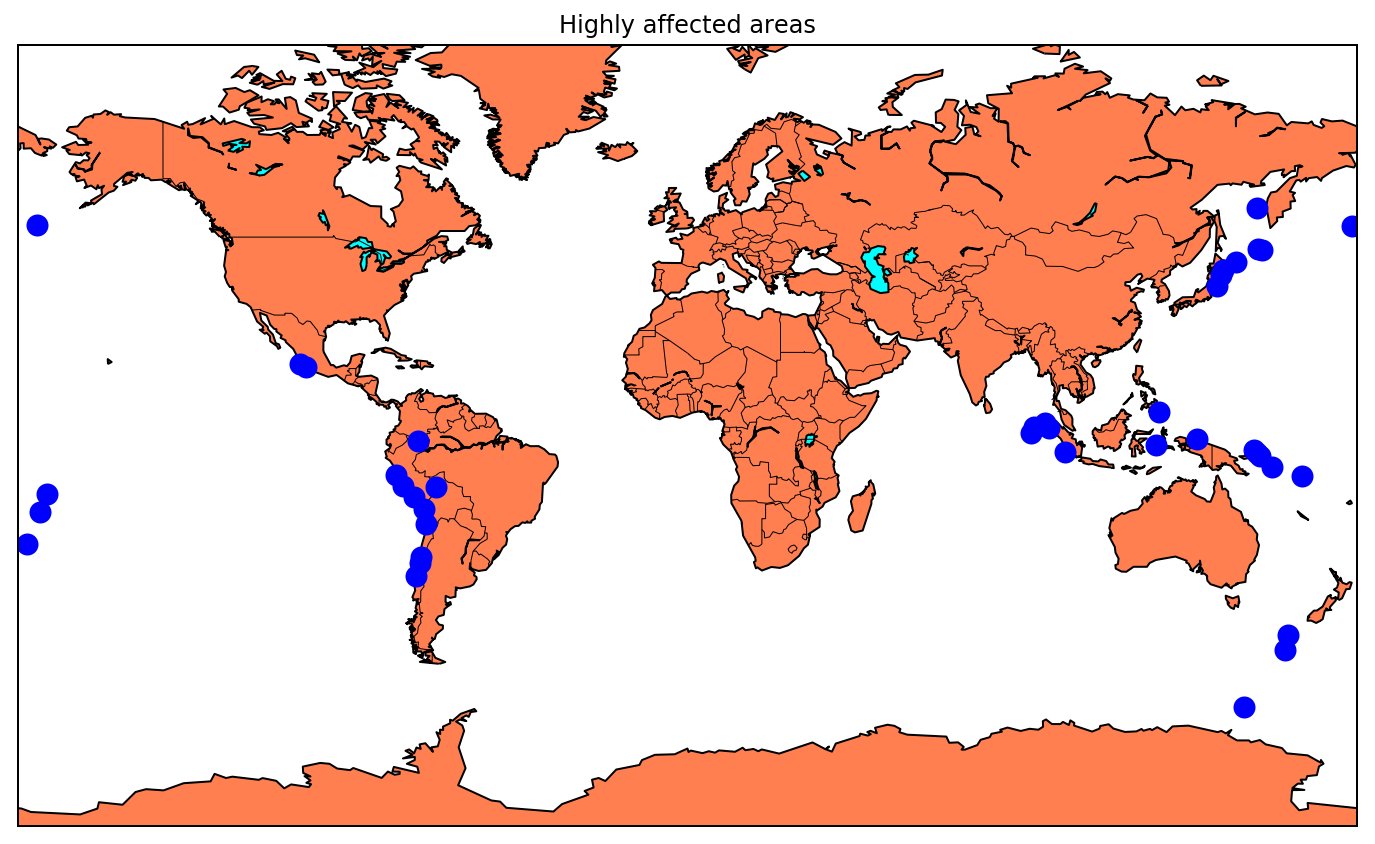

In [17]:
import matplotlib.pyplot as plt
highly_affected = earth[earth["Magnitude"]>=8]
longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
x,y = n(longitudes,latitudes)
fig3 = plt.figure(3,figsize=(12,10))
plt.title("Highly affected areas")
n.plot(x, y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()
plt.show()

In [18]:
earth.pivot_table(index = "Type", values = "Magnitude", aggfunc=len)

Magnitude
Type                        
Earthquake           23232.0
Explosion                4.0
Nuclear Explosion      175.0
Rock Burst               1.0

In [19]:
minimum = earth["Magnitude"].min()
maximum = earth["Magnitude"].max()
average = earth["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 5.5
Maximum: 9.1
Mean 5.882530753460003


Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


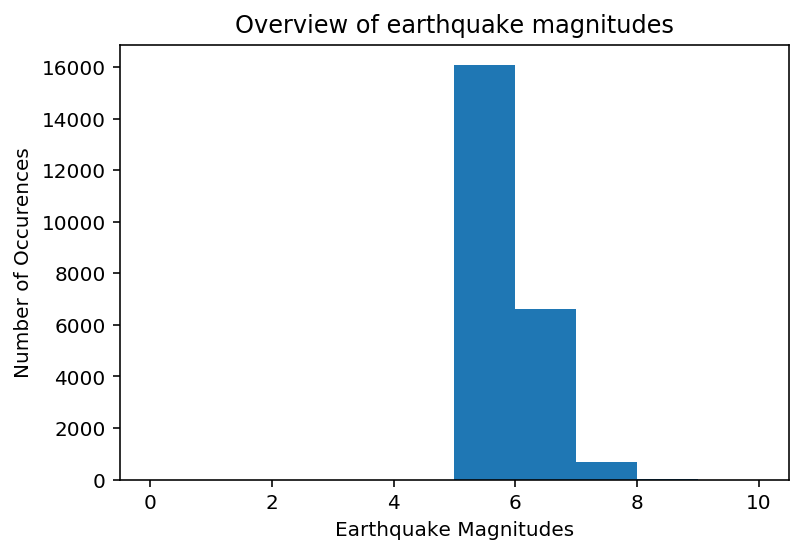

In [20]:
(n,bins, patches) = plt.hist(earth["Magnitude"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

In [21]:
import datetime as dt
earth["Date"] = pd.to_datetime(earth["Date"])
earth["Month"] = earth['Date'].dt.month

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
#month_occurrence = earth.pivot_table(index = "Month", values = ["Magnitude"] , aggfunc = )

month_occurrence = earth.groupby("Month").groups
print(len(month_occurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

for i in range(len(month)):
    val = month_occurrence[month[i]]
    occurrence.append(len(val))

print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


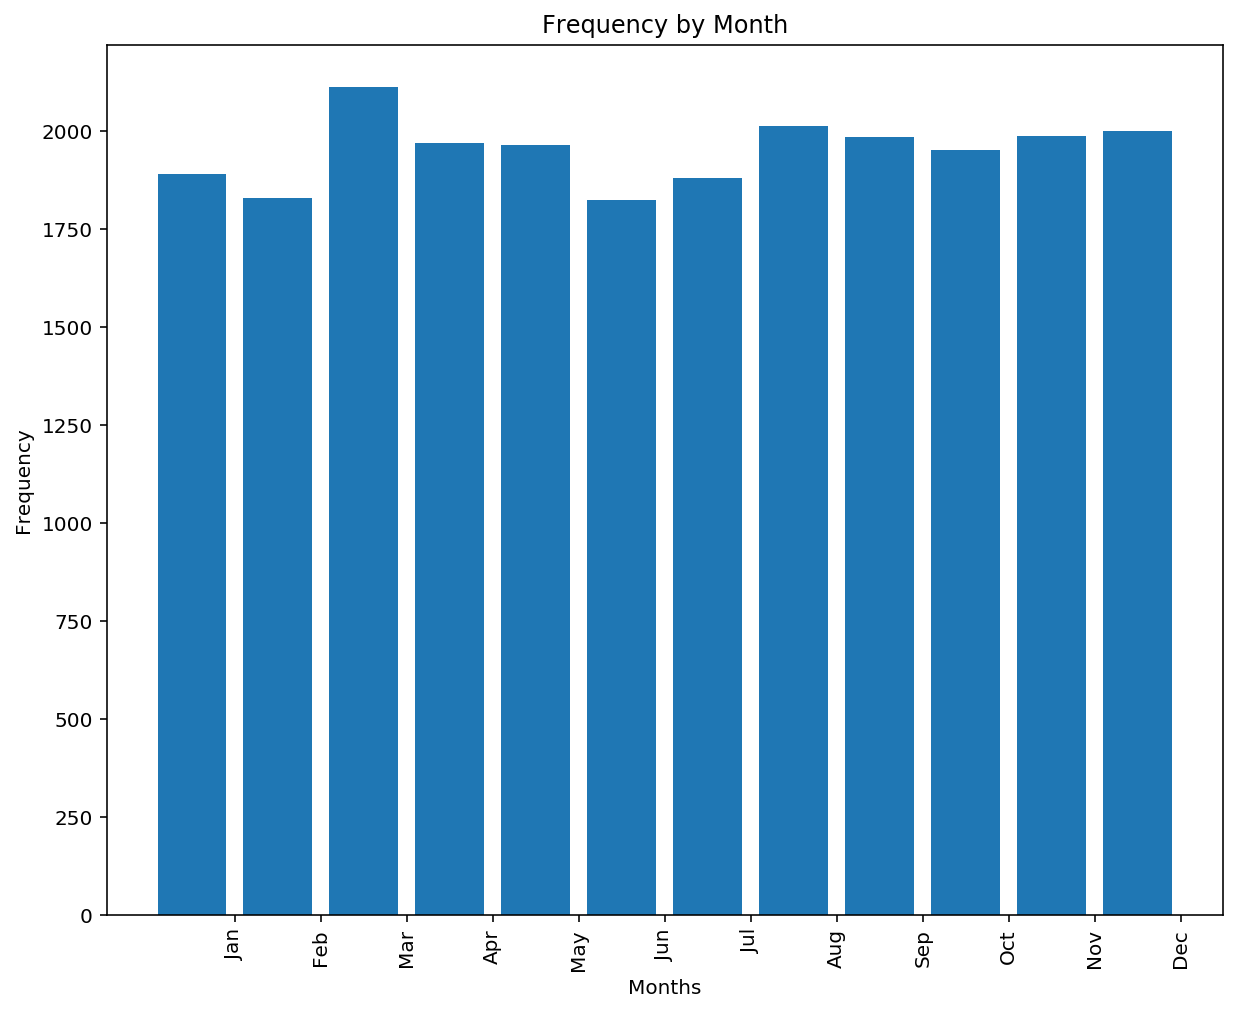

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 0.5

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months
bar_heights = occurrence

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
plt.title("Frequency by Month")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

In [24]:
earth["Year"] = earth['Date'].dt.year

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
supermoon_date = ["2016-11-14","2016-11-16","2016-11-15"]  #( one day before and after)
supermoon = earth[earth['Date'].isin(supermoon_date)]

supermoon

Date  Latitude  Longitude  Magnitude  Depth        Type  Month  \
23336 2016-11-14  -42.6058   173.2543        6.5   9.00  Earthquake     11   
23337 2016-11-14   51.0735   178.8402        5.6  34.26  Earthquake     11   
23338 2016-11-14  -42.3335   173.9064        5.7  12.00  Earthquake     11   
23339 2016-11-14  -41.7598   174.2992        5.5  17.21  Earthquake     11   
23340 2016-11-15  -41.7875   174.3064        5.5  10.00  Earthquake     11   
23341 2016-11-16  -20.2391  -173.0161        5.8  20.00  Earthquake     11   
23342 2016-11-16   -9.0027   113.2445        5.7  85.00  Earthquake     11   

       Year  
23336  2016  
23337  2016  
23338  2016  
23339  2016  
23340  2016  
23341  2016  
23342  2016

In [26]:
OZMINLAT = -50     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
OZMAXLAT = -34   # (Boigu Island 09° 16' S 142° 13' E)
OZMINLON = 165 # (Steep point 26° 09' 5" S 113° 09' 18" E
OZMAXLON = 179   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
OZMIDLAT = -41
OZMIDLON = 172

m = Basemap(llcrnrlon=OZMINLON, llcrnrlat=OZMINLAT, 
    urcrnrlon=OZMAXLON, urcrnrlat=OZMAXLAT, resolution='i',
    lat_0=OZMIDLAT, lon_0=OZMIDLON, 
    area_thresh=100.,projection='lcc')

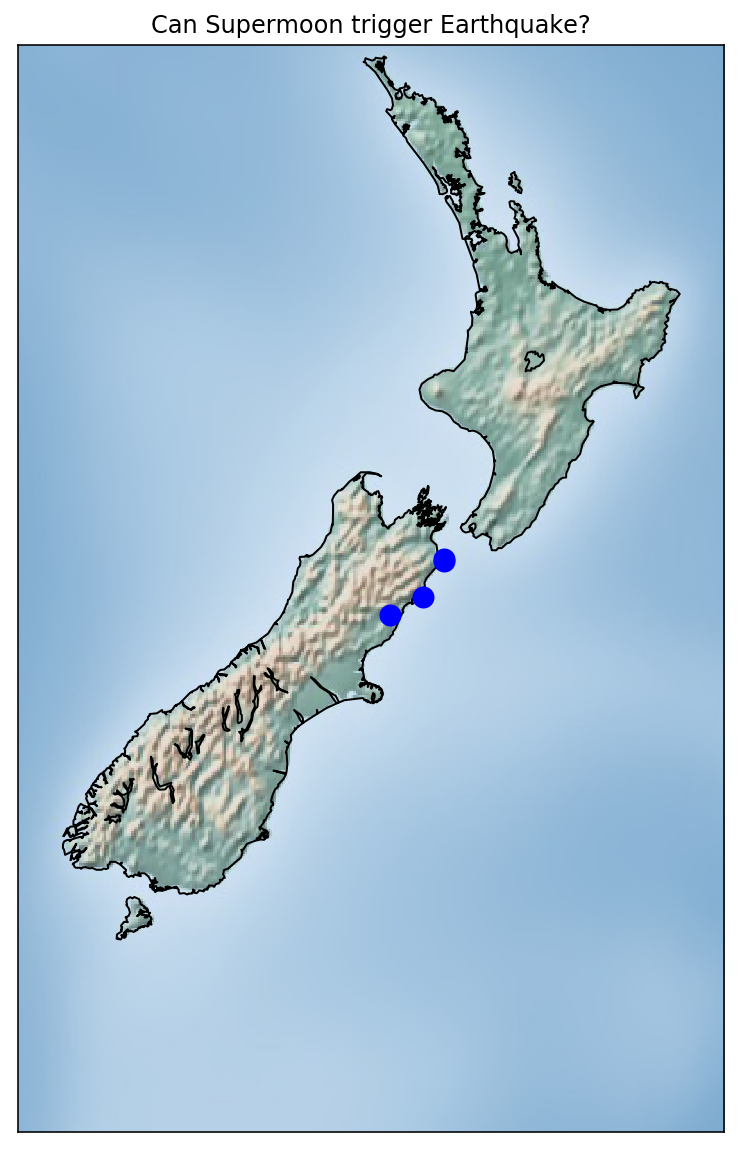

In [27]:
import matplotlib.pyplot as plt
longitudes = supermoon["Longitude"].tolist()
latitudes = supermoon["Latitude"].tolist()
x,y = m(longitudes,latitudes)
fig2 = plt.figure(3,figsize=(12,10))
plt.title("Can Supermoon trigger Earthquake?")
m.plot(x, y, "o", markersize = 10, color = 'blue')
m.drawcoastlines()

m.shadedrelief()
plt.show()

In [28]:
events_df=events_df.drop([3378, 7512, 20650])

events_df["Year"]=[(each.split("/")[2]) for each in events_df.iloc[:,0]]


In [29]:
data = events_df
year_list=list(data['Year'].unique())
YearType=[]


In [30]:
for i in year_list:
    val=data[data['Year']==i]
    YearType.append(len(val))
            
dfType=pd.DataFrame({'year_list':year_list, 'Count_Type':YearType})
new_index=(dfType['year_list'].sort_values(ascending=True)).index.values
sorted_data=dfType.reindex(new_index)


In [31]:
magnitude=[]
for i in sorted_data.year_list:
    x=data[data['Year']==i]
    data_magnitude=sum(x.Magnitude)/len(x.Magnitude)
    magnitude.append(data_magnitude)
sorted_data["Magnitude"]=magnitude

depth=[]
for i in sorted_data.year_list:
    x=data[data['Year']==i]
    data_depth=sum(x.Depth)/len(x.Depth)
    depth.append(data_depth)
sorted_data["Depth"]=depth

In [32]:
# bubble chart visualization
bubble_color=[each for each in sorted_data.Count_Type]
bubble=[
    {
        'y': sorted_data.Magnitude,
        'x': sorted_data.Depth,
        'mode':'markers',
        'marker':{
            'color':bubble_color,
            'size': sorted_data['Count_Type'],
            'sizemode':'area',
            'sizeref': (2.*max(sorted_data['Count_Type'])/(40.**2)),
            'showscale': True},
        'text':sorted_data.year_list
    }
]


In [33]:
import plotly.graph_objs as go
layout=go.Layout(
xaxis=dict(title='Average Depth of Each Year'),
yaxis=dict(title='Average Magnitude of Each Year'))
fig=go.Figure(data=bubble, layout=layout)
iplot(fig)

In [34]:
max_magnitude = list(data.groupby("Year").Magnitude.max())
sorted_data["Max_Magnitude"]=max_magnitude


In [35]:
trace0=go.Scatter3d(
    x=sorted_data.year_list,
    y=sorted_data.Magnitude,
    z=sorted_data.Depth,
    mode='markers',
    marker=dict(
        size=10,
        color=sorted_data.Max_Magnitude,
        colorscale='Earth',
        showscale=True,))

scatter_plot = [trace0]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene=dict(
    xaxis=dict(title='Year'),
    yaxis=dict( title='Magnitude'),
    zaxis=dict( title='Depth'),),)
fig = go.Figure(data=scatter_plot, layout=layout)
iplot(fig)

